<a href="https://colab.research.google.com/github/Janya-Sharma-22/machine_learning/blob/main/EXP_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AirQualityUCI.csv to AirQualityUCI (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')
print(df.head())

  Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0  ,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,...                                                                        
1  ,19:00:00,2,1292,112,9.4,955,103,1174,92,1559,...                                                                        
2  ,20:00:00,2.2,1402,88,9,939,131,1140,114,1555,...                                                                        
3  ,21:00:00,2.2,1376,80,9.2,948,172,1092,122,158...                                                                        
4  ,22:00:00,1.6,1272,51,6.5,836,131,1205,116,149...                                                                        


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 1 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                      --------------  ----- 
 0   Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH  9357 non-null   object
dtypes: object(1)
memory usage: 73.2+ KB
None


In [ ]:
print("✅ Column names in the dataset:")
print(df.columns.tolist())

✅ Column names in the dataset:
['Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH']


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print("✅ Removed unnecessary unnamed columns. Remaining columns:")
print(df.columns.tolist())

✅ Removed unnecessary unnamed columns. Remaining columns:
['Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH']


In [ ]:
print(df.isnull().sum())

Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH    0
dtype: int64


In [ ]:
df.replace(-200, np.nan, inplace=True)
print("✅ All occurrences of -200 replaced with NaN.")
print("Sample showing affected rows (if any):")
print(df[df.isna().any(axis=1)].head(10))

✅ All occurrences of -200 replaced with NaN.
Sample showing affected rows (if any):
Empty DataFrame
Columns: [Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH]
Index: []


In [ ]:
threshold = len(df) * 0.7
initial_columns = df.shape[1]
df = df.dropna(axis=1, thresh=threshold)
print(f"✅ Dropped columns with >30% missing values. Columns reduced from {initial_columns} to {df.shape[1]}")
print("Remaining columns:")
print(df.columns.tolist())

✅ Dropped columns with >30% missing values. Columns reduced from 1 to 1
Remaining columns:
['Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH']


In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)
print("✅ Sample rows after filling NaNs with column means:")
print(df.head(10))

✅ Sample rows after filling NaNs with column means:
  Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0  ,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,...                                                                        
1  ,19:00:00,2,1292,112,9.4,955,103,1174,92,1559,...                                                                        
2  ,20:00:00,2.2,1402,88,9,939,131,1140,114,1555,...                                                                        
3  ,21:00:00,2.2,1376,80,9.2,948,172,1092,122,158...                                                                        
4  ,22:00:00,1.6,1272,51,6.5,836,131,1205,116,149...                                                                        
5  ,23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,...                                                                        
6  ,00:00:00,1.2,1185,31,3.6,690,62,1462,77,1333,...                     

In [ ]:
print("✅ Summary statistics of numeric columns:")
print(df.describe())

✅ Summary statistics of numeric columns:
       Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count                                                9357                                                                        
unique                                                117                                                                        
top                                        ,,,,,,,,,,,,,,                                                                        
freq                                                 9241                                                                        


In [ ]:
df.columns = df.columns.str.strip()
print("✅ Cleaned column names:")
print(df.columns.tolist())

✅ Cleaned column names:
['Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH']


In [ ]:
print("✅ Listing all column names in the dataset:")
for col in df.columns:
    print(f"'{col}'")

✅ Listing all column names in the dataset:
'Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH'


In [ ]:
print("🔍 Matching columns with 'C6H6':")
print([col for col in df.columns if 'C6H6' in col])

🔍 Matching columns with 'C6H6':
['Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH']


In [ ]:
df.rename(columns=lambda x: x.strip(), inplace=True)
df.rename(columns={'C6H6(GT)': 'AQI'}, inplace=True)

In [ ]:
df.rename(columns={'C6H6(GT) ': 'AQI'}, inplace=True)

✅ Cleaned column names:
['Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH']


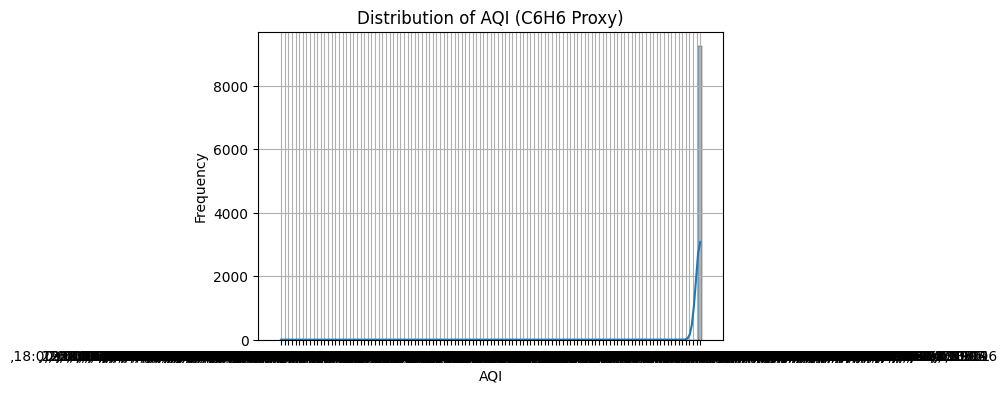

✅ Distribution of AQI (renamed from C6H6(GT)) plotted.


In [ ]:
df.columns = df.columns.str.strip()
print("✅ Cleaned column names:")
print(df.columns.tolist())

for col in df.columns:
    if 'C6H6' in col:
        df.rename(columns={col: 'AQI'}, inplace=True)
        break
plt.figure(figsize=(6, 4))
sns.histplot(df['AQI'], kde=True)
plt.title("Distribution of AQI (C6H6 Proxy)")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print("✅ Distribution of AQI (renamed from C6H6(GT)) plotted.")

In [ ]:
X = df.drop(['AQI', 'Date', 'Time'], axis=1, errors='ignore')
y = df['AQI']
print("✅ Features and target variable separated.")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

✅ Features and target variable separated.
Features shape: (9357, 0)
Target shape: (9357,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Dataset split into training and testing sets.")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

✅ Dataset split into training and testing sets.
Training samples: 7485
Testing samples: 1872
